In [224]:
# Importing necessary modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from sklearn import set_config

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.tree import export_graphviz, plot_tree
from IPython.display import Image
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, make_scorer
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
set_config(display='diagram')

## Business Value

Tanzania is currently a 62million population country. And still doesn't have enough well water resources for some of peoples in the country. Water is the basic needs for human body. Tanzania Government is currently working for solve this problem by improving clean water sources.There are many water wells already established, but some of them are non-functional or needs repair.

## Business Problem

In this model, our aim is the predict **functionality** of water points. This will help Tanzania Government for future work.
If a water point needs repair or why is not functional and what features affect functionality. With this model, we can help the Tanzanian authorities how to use water sources in a productive way.

In [225]:
# Import and looking the data.
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [226]:
# Importing labels as our target variable.
labels = pd.read_csv('train_labels.csv')
labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [227]:
#Looking our data.
train_data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [228]:
#Looking inside features.(what kind of column with the column names and missing values)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Data Understanding

    Our data has 39 different columns as feature include 'id'. Some of them has missing values and needs preparation before modeling.Our features suitable for predicting functionality which we can see for example which districts has good water source or not. 
    
    We have data from 1960 to 2013 with different funders at 21 different regions in Tanzania. And if the water source needs payment or what kind of payment it is. Also it has water quality as ; soft, salty , milky etc.
    
    We have quantity of the water source with source type as spring, shallow well etc.
    
    We are going to more focus data understanding as looking inside every column.

In [229]:
# Merging target and features.
train_data = train_data.merge(labels,on='id')
train_data

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


## Cleaning Process

### Train Data Cleaning

In [230]:
#Looking for missing values.
train_data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [231]:
# Turning target column from ternary to binary.
train_data['status_group'] = train_data['status_group'].replace('functional needs repair','non functional')


In [232]:
# Checking target variable values.
train_data['status_group'].value_counts()

functional        32259
non functional    27141
Name: status_group, dtype: int64

In [233]:
# Filling some columns as feature engineering.
train_data['funder'].fillna('Unkown',inplace=True)
train_data['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

train_data['installer'].fillna('Unkown',inplace=True)

train_data['subvillage'].fillna('Missing',inplace=True)
train_data['public_meeting'].fillna(False,inplace=True)

In [234]:
# Looking inside scheme management column.
train_data['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [235]:
# Filling scheme management column. 
train_data['scheme_management'].fillna('Missing',inplace=True)

In [236]:
# Filling permit column.
train_data['permit'].fillna(False,inplace=True)

In [237]:
# Boolean column converting process.
le = preprocessing.LabelEncoder()
train_data['public_meeting'] = le.fit_transform(train_data.public_meeting.values) 
train_data['permit'] = le.fit_transform(train_data.permit.values)
train_data.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting             int64
recorded_by               object
scheme_management         object
scheme_name               object
permit                     int64
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

### Looking Inside Each Column

    Column Names
    
    amount_tsh - Total static head (amount water available to waterpoint)
    date_recorded - The date the row was entered
    funder - Who funded the well
    gps_height - Altitude of the well
    installer - Organization that installed the well
    longitude - GPS coordinate
    latitude - GPS coordinate
    wpt_name - Name of the waterpoint if there is one
    num_private -
    basin - Geographic water basin
    subvillage - Geographic location
    region - Geographic location
    region_code - Geographic location (coded)
    district_code - Geographic location (coded)
    lga - Geographic location
    ward - Geographic location
    population - Population around the well
    public_meeting - True/False
    recorded_by - Group entering this row of data
    scheme_management - Who operates the waterpoint
    scheme_name - Who operates the waterpoint
    permit - If the waterpoint is permitted
    construction_year - Year the waterpoint was constructed
    extraction_type - The kind of extraction the waterpoint uses
    extraction_type_group - The kind of extraction the waterpoint uses
    extraction_type_class - The kind of extraction the waterpoint uses
    management - How the waterpoint is managed
    management_group - How the waterpoint is managed
    payment - What the water costs
    payment_type - What the water costs
    water_quality - The quality of the water
    quality_group - The quality of the water
    quantity - The quantity of water
    quantity_group - The quantity of water
    source - The source of the water
    source_type - The source of the water
    source_class - The source of the water
    waterpoint_type - The kind of waterpoint
    waterpoint_type_group - The kind of waterpoint


#### Amount_tsh Column

In [238]:
train_data['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [239]:
# Defining function for feature engineering on amount column.
def split_amount(amount):
    if amount < 10:
        return 'Less amount water source at this point.'
    return 'Enough amount water source at this point.'
    

In [240]:
#Applying function to this column.
train_data['amount_tsh'] = train_data['amount_tsh'].apply(split_amount)

In [241]:
train_data['amount_tsh'].value_counts()

Less amount water source at this point.      42295
Enough amount water source at this point.    17105
Name: amount_tsh, dtype: int64

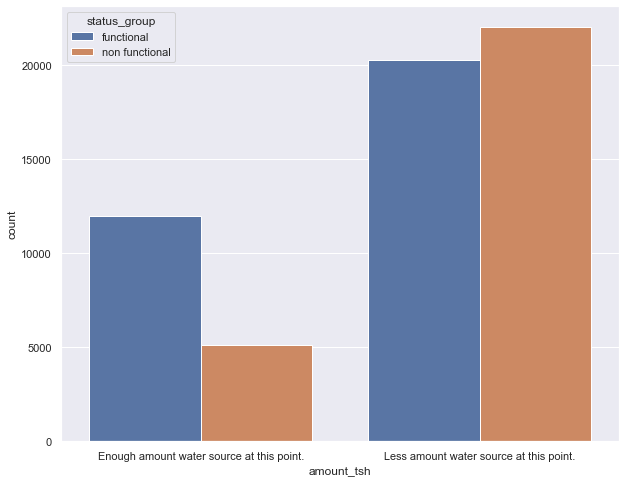

In [242]:
# Creating visualizing for this column with functionality.
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='amount_tsh', hue="status_group", data=train_data )

**If water point has enough source , there seems to be likely functional , on the other hand if there is not enough water source at the point almost half of them functional.**

#### Date Recorded Column

In [243]:
# Feature engineering in date recorded column.
years = []
for i in train_data.date_recorded:
    years.append(i[:4])

In [244]:
train_data['date_recorded'] = years

In [245]:
# For date column we are going to use just 'years'.

In [246]:
train_data['date_recorded'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: date_recorded, dtype: int64

In [247]:
# Replacing outliers with other less value.
train_data['date_recorded'].replace('2002','2012',inplace=True)
train_data['date_recorded'].replace('2004','2012',inplace=True)

In [248]:
train_data['date_recorded'].value_counts()

2011    28674
2013    24271
2012     6455
Name: date_recorded, dtype: int64

#### Funder Column 

In [249]:
train_data.funder.value_counts()

Government Of Tanzania        9084
Unkown                        3635
Danida                        3114
Hesawa                        2202
Rwssp                         1374
                              ... 
Tanedaps Society                 1
Dwe/ubalozi Wa Marekani          1
Noeli Mahobokela                 1
Deogratius Kasima                1
Muslimehefen International       1
Name: funder, Length: 1897, dtype: int64

In [250]:
funders = train_data['funder']

In [251]:
# Changing values at the funder column.
train_data.loc[train_data['funder']
               .value_counts()
               [train_data['funder']]
               .values < 201, 'funder'] = "Others"

In [252]:
train_data['funder'].value_counts()

Others                            18842
Government Of Tanzania             9084
Unkown                             3635
Danida                             3114
Hesawa                             2202
Rwssp                              1374
World Bank                         1349
Kkkt                               1287
World Vision                       1246
Unicef                             1057
Tasaf                               877
District Council                    843
Dhv                                 829
Private Individual                  826
Dwsp                                811
Unknown                             781
Norad                               765
Germany Republi                     610
Tcrs                                602
Ministry Of Water                   590
Water                               583
Dwe                                 484
Netherlands                         470
Hifab                               450
Adb                                 448


#### Gps_height Column

In [253]:
# Creating function for gps column seperation.
def split_gps(gps):
    if gps < 200:
        return 'Low altitude water source'
    if gps >= 200:
        return 'High altitude water source'

    

In [254]:
train_data['gps_height'] = train_data['gps_height'].apply(split_gps)

In [255]:
# Checking this column values.
train_data.gps_height.value_counts(normalize=True)

High altitude water source    0.569579
Low altitude water source     0.430421
Name: gps_height, dtype: float64

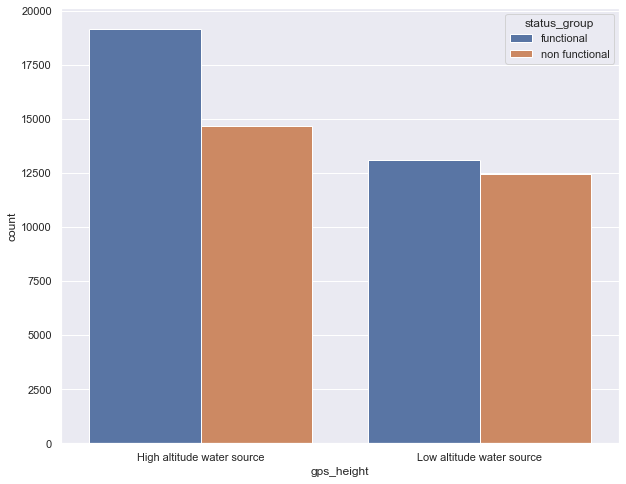

In [256]:
# Craeting graph for gps height with functionality.
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='gps_height', hue="status_group", data=train_data )

It tend to be at the high altitude more functional likely. At the low altitude looks like even functional and non functional water points.

#### Installer Column

In [257]:
train_data.installer.value_counts()

DWE                17402
Unkown              3655
Government          1825
RWE                 1206
Commu               1060
                   ...  
MSIKITI                1
LEI                    1
Busoga trust           1
Luali Kaima            1
Government /SDA        1
Name: installer, Length: 2146, dtype: int64

In [258]:
# Changing values at the intaller column.
train_data.loc[train_data['installer']
               .value_counts()
               [train_data['installer']]
               .values  > 1001, 'installer'] = "Above 1000 water point installers."

In [259]:
# Changing values at the installer column.
train_data.loc[train_data['installer']
               .value_counts()
               [train_data['installer']]
               .values < 100, 'installer'] = "Under 100 water point installers."

In [260]:
# Changing values at the installer column.
train_data.loc[train_data['installer']
               .value_counts()
               [train_data['installer']]
               .values < 1000, 'installer'] = "Under 1000 water point installers."

In [261]:
# Checking installer column values.
train_data.installer.value_counts()

Above 1000 water point installers.    26198
Under 1000 water point installers.    19657
Under 100 water point installers.     13545
Name: installer, dtype: int64

#### Basin Column

In [262]:
train_data.basin.value_counts() 

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

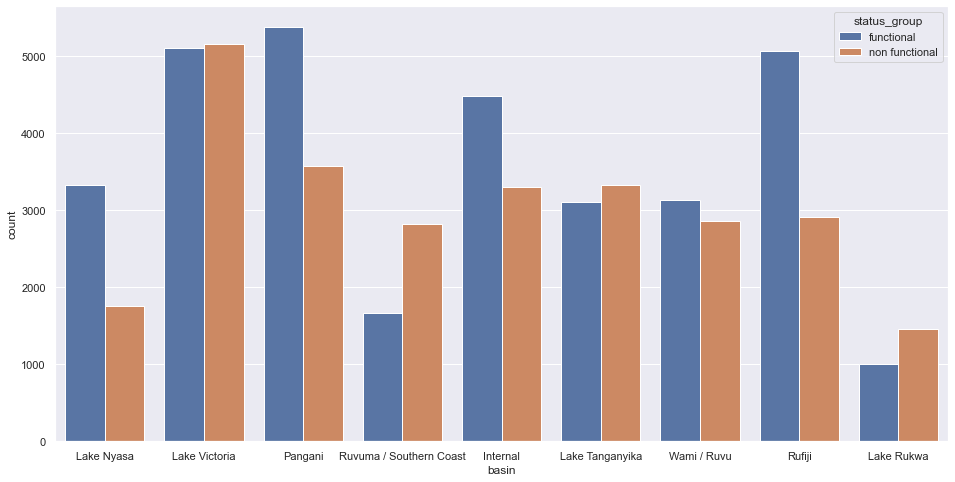

In [263]:
# Creating graph for basin column with functionality.
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(x='basin', hue="status_group", data=train_data)

#### Subvillage Column

In [264]:
train_data['subvillage'].value_counts()

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Missing      371
            ... 
Matakuja       1
Nyamuko        1
Salaliya       1
Hongi Juu      1
Wami           1
Name: subvillage, Length: 19288, dtype: int64

In [265]:
# Feature engineering on subvillage column.
train_data.loc[train_data['subvillage']
               .value_counts()
               [train_data['subvillage']]
               .values  > 100]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
2,34310,Enough amount water source at this point.,2013,Others,High altitude water source,Under 1000 water point installers.,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
20,48375,Enough amount water source at this point.,2011,Others,High altitude water source,Under 1000 water point installers.,34.473430,-9.594990,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
26,55012,Enough amount water source at this point.,2013,Others,High altitude water source,Under 100 water point installers.,39.370777,-9.942532,Ruhoma Primary School,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
42,52019,Enough amount water source at this point.,2011,Others,High altitude water source,Under 100 water point installers.,34.814574,-9.032503,Zahanati-Misssion,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
70,21990,Enough amount water source at this point.,2011,Government Of Tanzania,High altitude water source,Above 1000 water point installers.,35.818981,-8.934950,Kwampalanji,0,...,unknown,unknown,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59358,44951,Enough amount water source at this point.,2011,Unicef,High altitude water source,Above 1000 water point installers.,34.631938,-8.723208,Kwa Helena Mabena,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59365,8810,Less amount water source at this point.,2011,Unicef,High altitude water source,Above 1000 water point installers.,34.594790,-9.072904,Kwa Yohane Mhanza,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
59369,47527,Less amount water source at this point.,2011,Rc Church,Low altitude water source,Under 100 water point installers.,33.670049,-9.001535,Kwa Paval Dinno,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59384,72148,Less amount water source at this point.,2011,Others,Low altitude water source,Under 100 water point installers.,30.667805,-2.483710,Chamkube,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


#### Region Column

In [283]:
train_data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [310]:
sorted_region = train_data['population'].groupby(train_data['region']).sum().sort_values()

In [317]:
train_data['population'].groupby(train_data['region']).sum()

region
Arusha            878782
Dar es Salaam     193879
Dodoma            618481
Iringa            826331
Kagera            931796
Kigoma           1417392
Kilimanjaro       463070
Lindi             563370
Manyara           503043
Mara             1060886
Mbeya            1303559
Morogoro         1060090
Mtwara            462674
Mwanza            971145
Pwani             921177
Rukwa             674566
Ruvuma            656638
Shinyanga        1424109
Singida           584765
Tabora            550479
Tanga             628482
Name: population, dtype: int64

In [321]:
grouped_region

,region,id,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year
17,Shinyanga,182679138,"132,195.96","-13,902.38",0,84598,17785,1424109,3761,2364,328430
5,Kigoma,102667532,"85,084.53","-12,098.15",0,45056,5597,1417392,2663,1656,5606470
10,Mbeya,174055235,"155,552.65","-42,202.92",0,55668,19941,1303559,3914,2134,0
9,Mara,74861850,"67,249.11","-3,425.87",73,39380,6031,1060886,794,998,3899032
11,Morogoro,148280588,"148,405.91","-29,690.72",426,20030,12141,1060090,3861,3967,7960149
13,Mwanza,116488810,"75,945.14","-6,014.05",0,58828,12550,971145,2695,2975,707888
4,Kagera,123713407,"103,569.50","-6,504.22",0,59688,28869,931796,3277,2521,0
14,Pwani,97304169,"102,445.97","-18,471.23",3190,71162,52289,921177,2234,1530,4925027
0,Arusha,125452610,"122,451.59","-10,875.62",32,13872,22636,878782,3075,2650,6594069
3,Iringa,194159068,"184,739.36","-47,157.36",63,58234,18893,826331,5012,3174,9831406


In [323]:
grouped_region = train_data.groupby('region').sum().reset_index()
grouped_region.sort_values(by='population',ascending=True,inplace=True)

In [365]:
#Creating function to fix scientific notations.
def notation(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.0f}K'.format(x*1e-2)
    return s


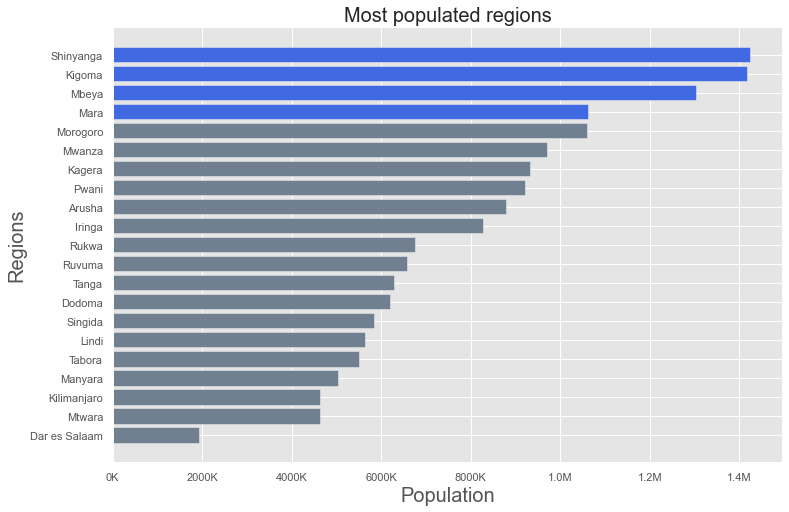

In [366]:
#Creating visual for region populations.
colors=[]
for region in grouped_region['region']:
    if (
        (region=='Shinyanga') or 
        (region=='Kigoma') or 
        (region=='Mbeya')or 
        (region=='Mara')
       ):
        colors.append('royalblue')
    else:
        colors.append('slategray')

fig, ax = plt.subplots(figsize=(12,8))
ax.barh(grouped_region['region'],grouped_region['population'],color=colors)
ax.set_title('Most populated regions',fontsize=20)
plt.xlabel('Population',fontsize=20)
plt.ylabel('Regions',fontsize=20)
ax.xaxis.set_major_formatter(notation)
plt.style.use('ggplot')

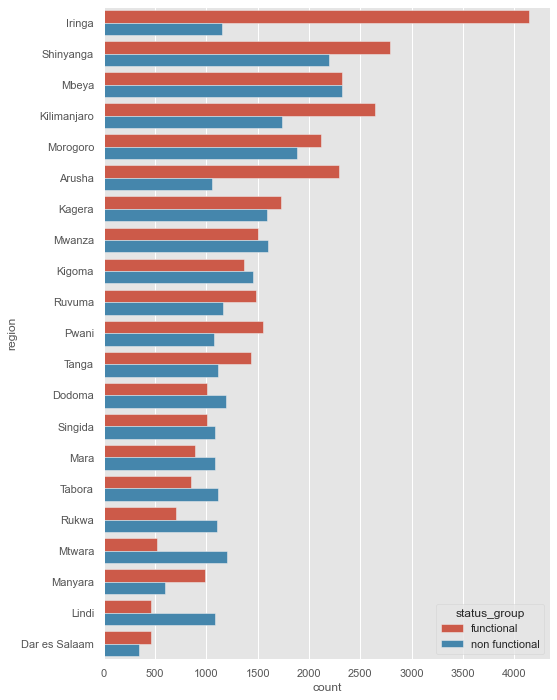

In [347]:
# Creating graph for regions with functionality.
fig, ax = plt.subplots(figsize=(8,12))
ax = sns.countplot(y='region', 
                   hue="status_group", 
                   data=train_data,order=train_data.region.value_counts().index
                  )

Seems to be most functional water points at 'Iringa','Shinyanga' and 'Kilimanjaro' region in order. What about these regions populations ?

#### Region_Code

In [274]:
train_data.region_code.value_counts() 

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      301
Name: region_code, dtype: int64

In [275]:
train_data['region_code'].replace(40,8,inplace=True)

In [276]:
train_data.region_code.value_counts() 

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      301
Name: region_code, dtype: int64

In [277]:
train_data.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

Region code and district code columns almost represent same things. Also they are in multicolienarity with each other. We are going to drop district code column.

#### Population

In [278]:
train_data.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [279]:
#train_data['population'].replace(to_replace = 0 , value =281, inplace=True) #changing 0's to mean

In [388]:
def split_population(p):
    if p < 10:
        return 'Low population at the water source.'
    if 10 < p < 200:
        return 'Under 200 people population.'
    return 'High population.'

    

In [389]:
train_data['population'] = train_data['population'].apply(split_population)

In [390]:
train_data.population.value_counts()

High population.                       38709
Under 200 people population.           13545
Low population at the water source.     7146
Name: population, dtype: int64

#### Public_meeting

In [53]:
train_data.public_meeting.value_counts(normalize=True)

1    0.858771
0    0.141229
Name: public_meeting, dtype: float64

#### Scheme_management Column

In [54]:
train_data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Missing              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [55]:
train_data.loc[train_data['scheme_management']
               .value_counts()
               [train_data['scheme_management']]
               .values < 200, 'scheme_management'] = "Other"

In [56]:
train_data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Missing              3877
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 936
Name: scheme_management, dtype: int64

#### Construction_year Column

In [57]:
train_data.construction_year.value_counts(normalize =True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

In [58]:
train_data[train_data.construction_year>0]['construction_year'].median()

2000.0

In [59]:
# Since construction_year column's median 2000 , We are going to replace missing value 0's to 2000.
train_data['construction_year'].replace(to_replace = 0, value = 2000, inplace=True)

In [60]:
train_data.construction_year.value_counts()

2000    22800
2010     2645
2008     2613
2009     2533
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1996      811
1980      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [61]:
def split_year(y):
    if y < 1970:
        return '60`s year construction.'
    if y < 1980:
        return '70`s year construction.'
    if y < 1990:
        return '80`s year construction.'
    if y < 2000:
        return '90`s year construction.'
    if y < 2010:
        return '2000`s year construction.'
    if y < 2020:
        return '2010`s year construction.'
    

In [62]:
train_data['construction_year'] = train_data['construction_year'].apply(split_year)

In [63]:
train_data['construction_year'].value_counts()

2000`s year construction.    36039
90`s year construction.       7678
80`s year construction.       5578
2010`s year construction.     5161
70`s year construction.       4406
60`s year construction.        538
Name: construction_year, dtype: int64

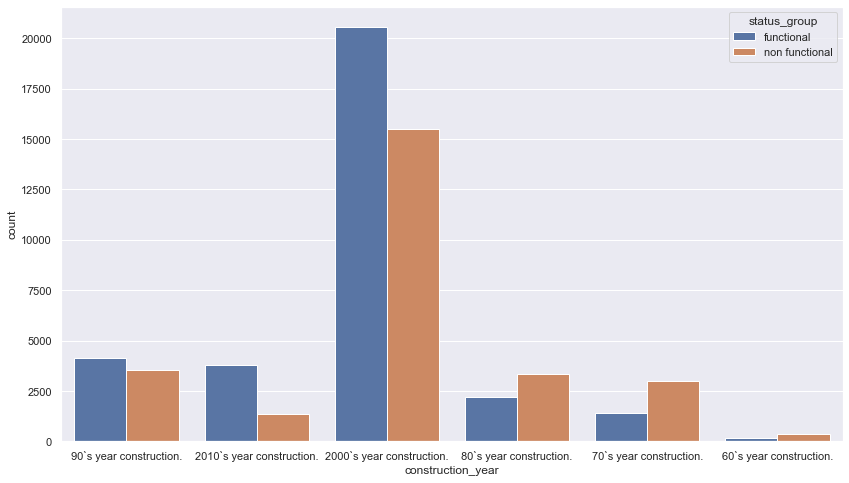

In [64]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='construction_year', hue="status_group", data=train_data )

Looks like most of the water points before 90's construction  non functional and needs repair.

#### Extraction_type Column

In [65]:
train_data['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [66]:
#Reducing this column's features.
train_data.loc[train_data['extraction_type']
               .value_counts()
               [train_data['extraction_type']]
               .values < 500, 'extraction_type'] = "Other"

In [67]:
train_data['extraction_type'].value_counts()

gravity          26780
nira/tanira       8154
other             6430
submersible       4764
swn 80            3670
mono              2865
india mark ii     2400
afridev           1770
ksb               1415
Other             1152
Name: extraction_type, dtype: int64

In [68]:
train_data['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [69]:
train_data['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [70]:
# Replacing this column's unneceseray values.
train_data['extraction_type_class'].replace('rope pump','other',inplace=True)
train_data['extraction_type_class'].replace('wind-powered','other',inplace=True)

#### Management Column

In [71]:
train_data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [72]:
#Reducing this column's features.
train_data.loc[train_data['management']
               .value_counts()
               [train_data['management']]
               .values < 900, 'management'] = "Other"

In [73]:
train_data['management'].replace('parastatal','water authority',inplace=True)

In [74]:
train_data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
water authority      2672
wua                  2535
Other                2267
private operator     1971
Name: management, dtype: int64

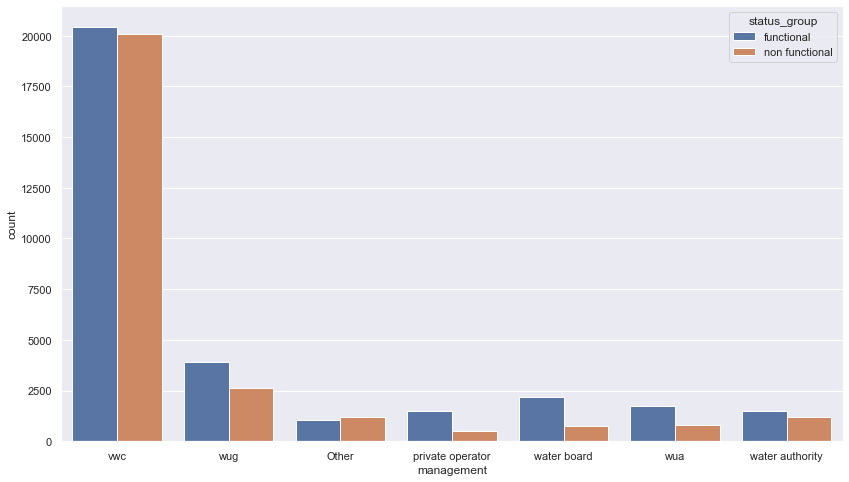

In [75]:
# Plotting management with functionality.
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='management', hue="status_group", data=train_data )

In [76]:
train_data['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [77]:
train_data['management_group'].replace('unkown','other',inplace=True)

#### Payment and Other Columns

In [78]:
train_data['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [79]:
train_data['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [80]:
train_data['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [81]:
train_data.loc[train_data['water_quality']
               .value_counts()
               [train_data['water_quality']]
               .values < 9000, 'water_quality'] = "Bad"

In [82]:
train_data['water_quality'].value_counts()

soft    50818
Bad      8582
Name: water_quality, dtype: int64

In [83]:
train_data['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

Text(0.5, 1.0, 'Water quality with functionality')

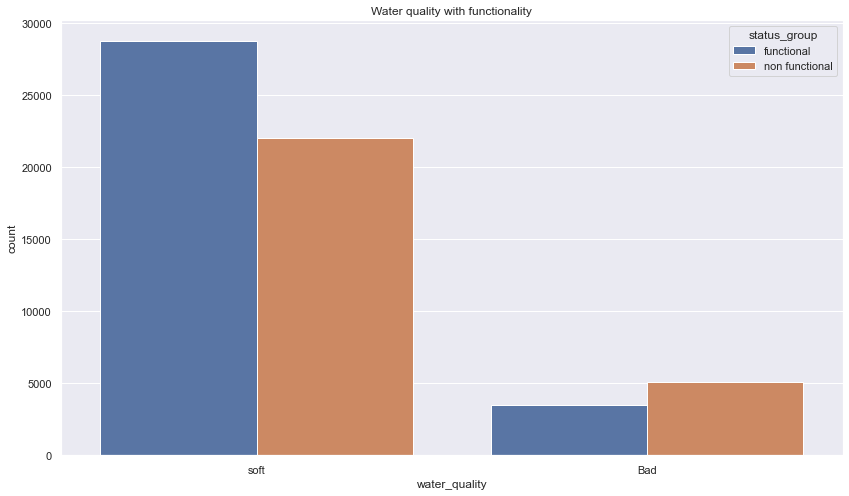

In [84]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='water_quality', hue="status_group", data=train_data )
ax.set_title('Water quality with functionality')

#### Quantity Column

In [85]:
train_data['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [86]:
train_data['quantity'].replace('unknown','insufficient',inplace=True)

In [87]:
train_data['quantity'].value_counts()

enough          33186
insufficient    15918
dry              6246
seasonal         4050
Name: quantity, dtype: int64

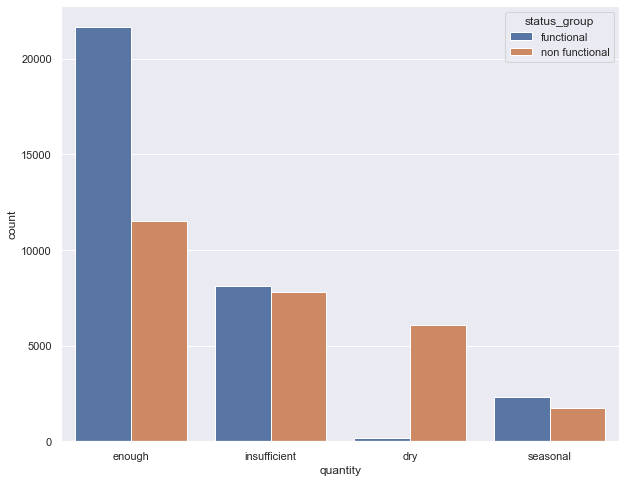

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='quantity', hue="status_group", data=train_data)

   It can be seen obviously that although there are enough water quantity in some wells, they are non-functional. When looking at this graph, dry quantity water points have a highly correlation with non-functionality. If the water point is dry , there is high chance the water point is non functional. On the other hand, if the quantity is enough, there is a higher chance to find functional water points.

In [89]:
train_data['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [90]:
train_data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [91]:
train_data.loc[train_data['source']
               .value_counts()
               [train_data['source']]
               .values < 900, 'source'] = "Other"

In [92]:
train_data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
Other                    2573
rainwater harvesting     2295
Name: source, dtype: int64

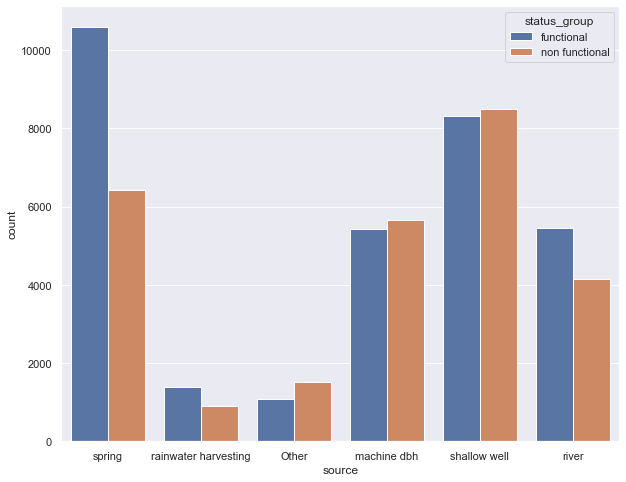

In [93]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='source', hue="status_group", data=train_data)

Looks like spring waters most valuable according to this graph. If th water point takes spring water mostly water point will be functional. The other water sources almost evenly functional and non functional depend on other features. 

In [94]:
train_data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [95]:
train_data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [96]:
train_data['source_class'].replace('unknown','surface',inplace=True)

In [377]:
train_data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [378]:
train_data.loc[train_data['waterpoint_type']
               .value_counts()
               [train_data['waterpoint_type']]
               .values < 900, 'waterpoint_type'] = "other"

In [379]:
train_data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           7287
communal standpipe multiple     6103
Name: waterpoint_type, dtype: int64

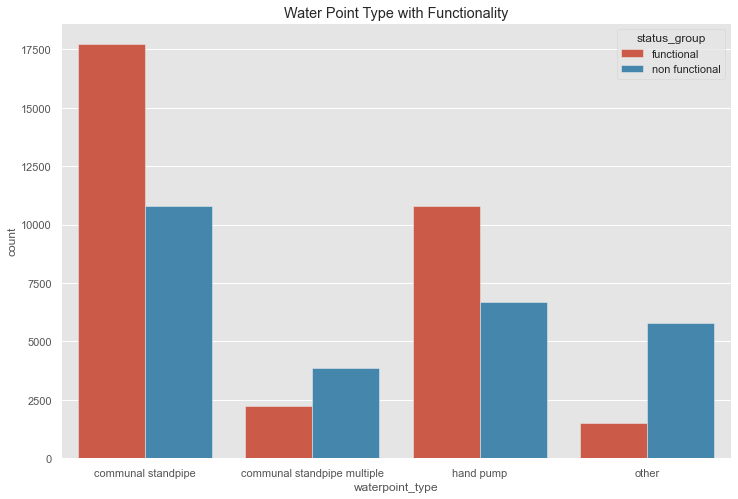

In [385]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=train_data)
ax.set_title('Water Point Type with Functionality')
plt.show()

In [100]:
train_data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [101]:
train_data['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [102]:
train_data['longitude'].replace(0.0,train_data
                                [train_data['longitude']!= 0]
                                ['longitude'].mean(),
                               inplace=True)

In [103]:
train_data['latitude'].value_counts()

-2.000000e-08    1812
-6.985842e+00       2
-3.797579e+00       2
-6.981884e+00       2
-7.104625e+00       2
                 ... 
-5.726001e+00       1
-9.646831e+00       1
-8.124530e+00       1
-2.535985e+00       1
-2.598965e+00       1
Name: latitude, Length: 57517, dtype: int64

In [104]:
train_data[train_data['permit'] == 1]['status_group'].value_counts()

functional        21541
non functional    17311
Name: status_group, dtype: int64

In [105]:
train_data[train_data['permit'] == 0]['status_group'].value_counts()

functional        10718
non functional     9830
Name: status_group, dtype: int64

In [106]:
# EDA Exploration data analysis

In [107]:
le = LabelEncoder()
train_data['status_group'] = le.fit_transform(train_data['status_group'].values) 

In [108]:
train_data['status_group'].value_counts()

0    32259
1    27141
Name: status_group, dtype: int64

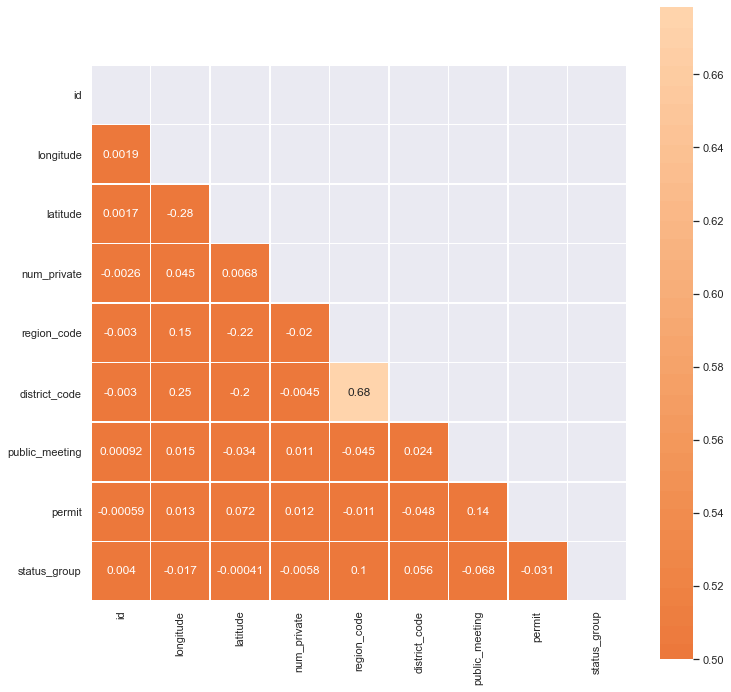

In [109]:
## Checking Correlation
plt.figure(figsize=(12,12))
corr = train_data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask ,annot=True, center=0, vmin=.5, square=True, linewidth=.5)
plt.show()

### Dropping Unnecessary Columns

In [110]:
#Depend on similar values or unncessary values and multicolienarity , going to drop these columns.
train_data.drop(columns=['id','subvillage','payment_type','quantity_group','num_private',
                        'source_type','waterpoint_type_group','district_code','recorded_by',
                         'scheme_name','extraction_type_group','lga','ward','wpt_name'],inplace=True,axis=1)

In [111]:
#Checking if we missed something.
train_data.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
region                   0
region_code              0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
management_group         0
payment                  0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
status_group             0
dtype: int64

In [112]:
# Creating function for metric visualizing.
def get_metrics(clf, X, y):
    y_pred = clf.predict(X)
    
    my_metrics = (
        (accuracy_score, 'accuracy_score'),
        (recall_score, 'recall_score'),
        (precision_score, 'precision_score'),
        (f1_score, 'f1_score')
    )
    
    for f, name in my_metrics:
        print(name.title())
        print(f(y, y_pred))
        print()
        
    plot_confusion_matrix(clf, X, y, normalize='true', cmap='Blues')
    plt.grid(False)
    plt.show()



In [113]:
# Importing in-built score modules.
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    plot_confusion_matrix
)

In [114]:
#looking each columns types.
train_data.dtypes

amount_tsh                object
date_recorded             object
funder                    object
gps_height                object
installer                 object
longitude                float64
latitude                 float64
basin                     object
region                    object
region_code                int64
population                object
public_meeting             int64
scheme_management         object
permit                     int64
construction_year         object
extraction_type           object
extraction_type_class     object
management                object
management_group          object
payment                   object
water_quality             object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group               int32
dtype: object

## First Model(LogReg)

In [115]:
#Create X and y dataframes and train-test split them
y = train_data['status_group']
X = train_data.drop(columns = ['status_group'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Create categorical and continuous feature split
X_train_cat = X_train.select_dtypes('object')
X_train_cont = X_train.select_dtypes(['float64', 'int64'])

#Set up pipeline for scaling continuous variables
continuous_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())
])

#Set up pipeline for encoding categorical variables
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

#Bind the scaling and encoding process together
transformers = ColumnTransformer(transformers=[
    ('continuous', continuous_pipeline, X_train_cont.columns),
    ('categorical', categorical_pipeline, X_train_cat.columns)    
])

#Pipeline for running the model
model1 = Pipeline(steps=[
    ('transformers', transformers),
    ('log', LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state=42))
])

#Fitting and checking the score
model1.fit(X_train, y_train)
model1.score(X_train, y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7543883277216611

In [116]:
model1.steps

[('transformers',
  ColumnTransformer(transformers=[('continuous',
                                   Pipeline(steps=[('ss', StandardScaler())]),
                                   Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                  ('categorical',
                                   Pipeline(steps=[('ohe',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
         'basin', 'region', 'population', 'scheme_management',
         'construction_year', 'extraction_type', 'extraction_type_class',
         'management', 'management_group', 'payment', 'water_quality',
         'quality_group', 'quantity', 'source', 'source_class',
         'waterpoint_type'],
        dtype='object'))])),
 ('log', LogisticRegression(class_weight='balanced', random_state=42))]

In [117]:
model1[1].coef_.shape

(1, 168)

In [118]:
# First model score on test data.
model1.score(X_test,y_test)

0.7521885521885522

In [119]:
model1

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'region', 'population', 'scheme_management',
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=42))])

Accuracy_Score
0.7521885521885522

Recall_Score
0.6929798578199052

Precision_Score
0.7443525294304805

F1_Score
0.7177481208774353



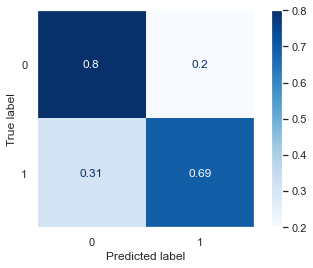

In [120]:
# Predicting test data for using on function.
test_pred = model1.predict(X_test)
get_metrics(model1,X_test,y_test)

In [121]:
# Looking metrics.
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      8098
           1       0.74      0.69      0.72      6752

    accuracy                           0.75     14850
   macro avg       0.75      0.75      0.75     14850
weighted avg       0.75      0.75      0.75     14850



In [122]:
# Creating different parameters for gridsearch on forst model(logistic regression)
ps={
    "log__C":np.logspace(-3,3,7), 
    "log__penalty":["l1","l2"]
}

In [123]:
# Grid Search on first model.
grids = GridSearchCV(model1,param_grid=ps,cv=5)

In [124]:
# Fitting train data.
grids.fit(X_train,y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformers',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['amount_tsh', 'date_recorded...
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             param_grid={'log__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'log__penalty': ['l1', 'l2']})

In [125]:
grids.score(X_train,y_train)

0.7546576879910213

Accuracy_Score
0.7521885521885522

Recall_Score
0.6929798578199052

Precision_Score
0.7443525294304805

F1_Score
0.7177481208774353



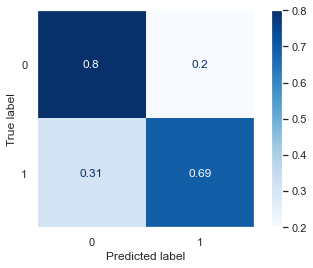

In [126]:
# Looking grid search test results for first model.
get_metrics(model1,X_test,y_test)



**Our first model Logistic Regression didn't give the best value with Grid Search, We are going to forward with other models.** 


## Second Model(KNN)

In [127]:
# Creating second model pipeline with KNeighbors Classifier.
model2= Pipeline(steps=[
    ('transformers', transformers),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

#Fitting and checking the score
model2.fit(X_train, y_train)
model2.score(X_train, y_train)

0.8902805836139169

Accuracy_Score
0.7938720538720538

Recall_Score
0.7473341232227488

Precision_Score
0.7883143258865802

F1_Score
0.7672774272029196



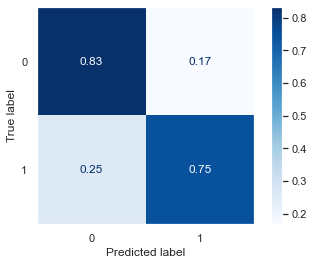

In [128]:
# Looking test results for second model.
get_metrics(model2,X_test,y_test)

In [129]:
# Creating different parameters for gridsearch on second model(KNeighbors Classifier)
prams = {
    'knn__n_neighbors': [3,5,11,19],
    'knn__weights': ['uniform','distance'],
    'knn__metric':['euclidean','manhattan']
}

In [130]:
# Grid Search initializing for second model.
gr = GridSearchCV(model2,param_grid=prams,cv=3)

In [131]:
gr.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transformers',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['amount_tsh', 'date_recorded...
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object'))])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 11, 19],
                         'knn__weights': ['uniform', 'distance']})

In [132]:
# Grid Search train result.
gr.score(X_train,y_train)

0.997665544332211

Accuracy_Score
0.806060606060606

Recall_Score
0.754739336492891

Precision_Score
0.8063291139240506

F1_Score
0.7796817625458997



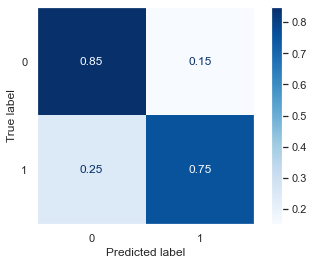

In [133]:
# Grid Search test results.
get_metrics(gr,X_test,y_test)

## Third Model(DecisionTree)

In [134]:
# Creating third model pipeline with Decision Tree.
model3= Pipeline(steps=[
    ('transformers', transformers),
    ('tree', DecisionTreeClassifier(criterion='gini',max_depth=5))
])

#Fitting and checking the score
model3.fit(X_train, y_train)
model3.score(X_train, y_train)

0.7216835016835017

In [135]:
model3

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'region', 'population', 'scheme_management',
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object'))])),
                ('tree', DecisionTreeClassifier(max_depth=5))])

Accuracy_Score
0.7188552188552189

Recall_Score
0.5266587677725119

Precision_Score
0.7841234840132304

F1_Score
0.6301054310268451



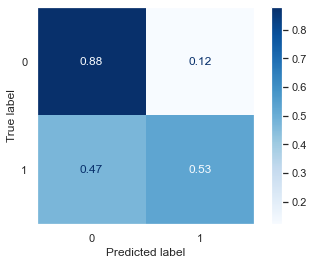

In [136]:
# Looking for metric result for test data.
get_metrics(model3,X_test,y_test)

In [137]:
model3.named_steps

{'transformers': ColumnTransformer(transformers=[('continuous',
                                  Pipeline(steps=[('ss', StandardScaler())]),
                                  Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                 ('categorical',
                                  Pipeline(steps=[('ohe',
                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                  Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
        'basin', 'region', 'population', 'scheme_management',
        'construction_year', 'extraction_type', 'extraction_type_class',
        'management', 'management_group', 'payment', 'water_quality',
        'quality_group', 'quantity', 'source', 'source_class',
        'waterpoint_type'],
       dtype='object'))]),
 'tree': DecisionTreeClassifier(max_depth=5)}

In [138]:
# Creating different parameters for gridsearch on third model(Decision Tree)
param = {
    'tree__criterion': ['gini', 'entropy'],
    'tree__max_depth': [1,3,5,None],
    'tree__max_features': ['sqrt', 'log2', None],
}
# njobs = -2 

In [139]:
# Grid Search initializing for third model.
gr = GridSearchCV(model3,param_grid=param,scoring='recall')

In [140]:
# Fitting and looking train set result.
gr.fit(X_train, y_train)
gr.score(X_train, y_train)

0.9962234538231399

Accuracy_Score
0.7833670033670034

Recall_Score
0.7664395734597157

Precision_Score
0.7593543653705063

F1_Score
0.7628805189061694



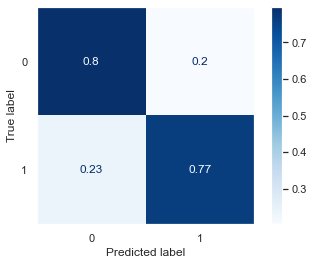

In [141]:
# Looking test set results.
get_metrics(gr,X_test,y_test)

In [142]:
gr.best_params_

{'tree__criterion': 'gini',
 'tree__max_depth': None,
 'tree__max_features': None}

In [143]:
gr.best_estimator_

Pipeline(steps=[('transformers',
                 ColumnTransformer(transformers=[('continuous',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'region', 'population', 'scheme_management',
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object'))])),
                ('tree', DecisionTreeClassifier())])

## Fourth (Ensemble) Model

In [144]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [145]:
# Creating fourth model pipeline with ensemble model.
model4= Pipeline(steps=[
    ('transformers', transformers),
    ('bag', BaggingClassifier(XGBClassifier(),
                              n_estimators=10, random_state=0))
])

#Fitting and checking the score
model4.fit(X_train, y_train)
model4.score(X_train, y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:28:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:28:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:28:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:28:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.8503254769921437

Accuracy_Score
0.8117171717171717

Recall_Score
0.7181575829383886

Precision_Score
0.8444792755137582

F1_Score
0.7762125820393788



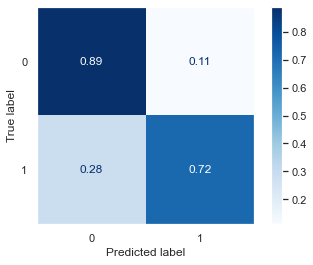

In [146]:
#Looking test set result.
get_metrics(model4,X_test,y_test)

## Random Forest

In [147]:
# Creating Random Forest model with pipeline.
model5= Pipeline(steps=[
    ('transformers', transformers),
    ('rf', RandomForestClassifier(random_state=42))
])

#Fitting and checking the score
model5.fit(X_train, y_train)
model5.score(X_train, y_train)

0.9975533108866442

Accuracy_Score
0.813063973063973

Recall_Score
0.7711789099526066

Precision_Score
0.8087915501708605

F1_Score
0.7895375284306292



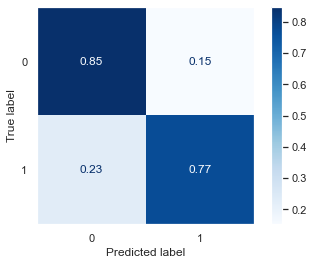

In [148]:
#Looking test set result.
get_metrics(model5,X_test,y_test)

In [149]:
# Looking cross validation for random forest.
cross_val_score(model5,X_train,y_train)

array([0.81661055, 0.81234568, 0.81133558, 0.81661055, 0.80606061])

In [150]:
# Creating different paramaters for random forest grid search.
param_grid = { 
    'rf__n_estimators': [2,5,10,20,50,75,150],
    'rf__max_features': ['auto', 'sqrt', 'log2'],
    'rf__max_depth' : [2,5,10,20,50,None],
    'rf__criterion' :['gini', 'entropy'],
    'rf__min_samples_split':[2,5,10,20]
}

In [151]:
# CV_rfc = GridSearchCV(estimator=model5, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

In [152]:
# CV_rfc.score(X_train,y_train)

In [153]:
#get_metrics(CV_rfc,X_test,y_test)

In [154]:
# Predicting test set on random forest model.
test_pred = model5.predict(X_test)

In [155]:
# Looking metrics.
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      8098
           1       0.81      0.77      0.79      6752

    accuracy                           0.81     14850
   macro avg       0.81      0.81      0.81     14850
weighted avg       0.81      0.81      0.81     14850



## Voting Classifier

In [156]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [157]:
# Initializing another ensemble model.
eclf = VotingClassifier(estimators=[('1', model1), ('2', model2),('3', model3)])

In [158]:
#Fitting train data.
eclf.fit(X_train,y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('1',
                              Pipeline(steps=[('transformers',
                                               ColumnTransformer(transformers=[('continuous',
                                                                                Pipeline(steps=[('ss',
                                                                                                 StandardScaler())]),
                                                                                Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                                               ('categorical',
                                                                                Pipeline(steps=[('ohe',
                                                                                                 OneHotEncoder(handle_unknown='ignore'))]),
                                                                                Index(['amount_tsh', 'date_re...
                                                                                Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'basin', 'region', 'population', 'scheme_management',
       'construction_year', 'extraction_type', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object'))])),
                                              ('tree',
                                               DecisionTreeClassifier(max_depth=5))]))])

In [159]:
#Checking train set score.
eclf.score(X_train,y_train)

0.8051178451178451

In [160]:
#Checking test set score.
eclf.score(X_test,y_test)

0.7764309764309765

In [161]:
# Predicting test set on Voting Classifier.
preds= eclf.predict(X_test)

In [162]:
# Looking metrics.
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      8098
           1       0.82      0.66      0.73      6752

    accuracy                           0.78     14850
   macro avg       0.78      0.77      0.77     14850
weighted avg       0.78      0.78      0.77     14850



## XGBBoosting with Grid Search

In [163]:
from xgboost import XGBClassifier

In [164]:
# Initializing XGB Boosting model.
model6 = Pipeline(steps=[
    ('transformers', transformers),
    ('xg', XGBClassifier(random_state=42))
])

#Fitting and checking the score
model6.fit(X_train, y_train)
model6.score(X_train, y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8499438832772166

In [165]:
# Checking test set result.
model6.score(X_test,y_test)

0.8057912457912458

In [166]:
# Different paramaters for xgb boosting.
param_grid = {
    'xg__learning_rate': [0.1, 0.2],
    'xg__max_depth': [6],
    'xg__min_child_weight': [1, 2],
    'xg__subsample': [0.5, 0.7],
    'xg__n_estimators': [100],
}

In [167]:
#Initializing gridsearch and fitting train data.
grid = GridSearchCV(model6,param_grid=param_grid,scoring='recall')
grid.fit(X_train,y_train)

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:46] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:47] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:49] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:55] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:34:59] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:01] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:02] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:05] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:08] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:09] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:13] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:15] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:18] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:28] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:34] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:35:36] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('transformers',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['amount_tsh', 'date_recorded', 'fu...
                                                      n_estimators=100,
                                                      n_jobs=16,
                                                      num_parallel_tree=1,
                                                      predictor='auto',
                                                      random_state=42,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None))]),
             param_grid={'xg__learning_rate': [0.1, 0.2], 'xg__max_depth': [6],
                         'xg__min_child_weight': [1, 2],
                         'xg__n_estimators': [100],
                         'xg__subsample': [0.5, 0.7]},
             scoring='recall')

In [168]:
# Grid Search best parameters.
grid.best_params_

{'xg__learning_rate': 0.2,
 'xg__max_depth': 6,
 'xg__min_child_weight': 1,
 'xg__n_estimators': 100,
 'xg__subsample': 0.5}

In [169]:
# Checking train set result.
grid.score(X_train,y_train)

0.7491294325371524

In [170]:
# Checking test set result.
grid.score(X_test,y_test)

0.7160841232227488

Accuracy_Score
0.8057912457912458

Recall_Score
0.7177132701421801

Precision_Score
0.8320741758241759

F1_Score
0.7706743002544529



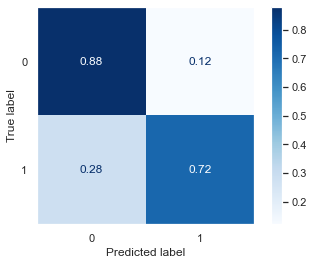

In [171]:
# Looking metrics.
get_metrics(model6,X_test,y_test)

In [172]:
#Predicting test result.
preds= grid.predict(X_test)

In [173]:
# Checking metrics.
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      8098
           1       0.83      0.72      0.77      6752

    accuracy                           0.80     14850
   macro avg       0.81      0.80      0.80     14850
weighted avg       0.81      0.80      0.80     14850



## Gradient Boosting

In [174]:
# Initializing Gradient Boosting Classifier with pipeline.
model7 = Pipeline(steps=[
    ('transformers', transformers),
    ('Gbs', GradientBoostingClassifier(random_state=42))
])

#Fitting and checking the score
model7.fit(X_train, y_train)
model7.score(X_train, y_train)

0.770976430976431

In [175]:
# Checking test set result.
model7.score(X_test, y_test)

0.7616161616161616

In [176]:
# Creating different parameters.
params = {
    'Gbs__learning_rate': [0.075, 0.7],
    'Gbs__max_depth': [13, 14],
    'Gbs__min_samples_leaf': [15, 16],
    'Gbs__max_features': [1.0],
    'Gbs__n_estimators': [100, 200]
} 

In [177]:
# Initializing grid search and fitting train data.
grid_grad = GridSearchCV(model7, params, cv=5)
grid_grad.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformers',
                                        ColumnTransformer(transformers=[('continuous',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['longitude', 'latitude', 'region_code', 'public_meeting', 'permit'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['amount_tsh', 'date_recorded...
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_class',
       'waterpoint_type'],
      dtype='object'))])),
                                       ('Gbs',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'Gbs__learning_rate': [0.075, 0.7],
                         'Gbs__max_depth': [13, 14], 'Gbs__max_features': [1.0],
                         'Gbs__min_samples_leaf': [15, 16],
                         'Gbs__n_estimators': [100, 200]})

In [193]:
grid_grad.best_params_

{'Gbs__learning_rate': 0.075,
 'Gbs__max_depth': 14,
 'Gbs__max_features': 1.0,
 'Gbs__min_samples_leaf': 16,
 'Gbs__n_estimators': 200}

In [178]:
predss = grid_grad.predict(X_test)

In [179]:
#Checking metrics.
print(classification_report(y_test,predss))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      8098
           1       0.84      0.76      0.80      6752

    accuracy                           0.83     14850
   macro avg       0.83      0.82      0.82     14850
weighted avg       0.83      0.83      0.82     14850



Accuracy_Score
0.8251851851851851

Recall_Score
0.7619964454976303

Precision_Score
0.8387675252689925

F1_Score
0.7985410523048269



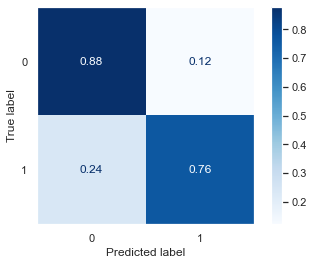

In [180]:
get_metrics(grid_grad,X_test,y_test)

In [402]:
cross_val_score(grid_grad,X_test,y_test)

array([0.79292929, 0.79427609, 0.79326599, 0.7983165 , 0.78114478])

**F-1 score explain how good the quality of predictions are and how completely we've predicted labels from dataset** . My model predicted %79 percent of data correctly according to f-1 score.

### Out of Pipeline model for visualizing features

In [181]:
# Seperating numerical and categorical columns.
numerical_cols = X_train.select_dtypes('number').columns.tolist()
categorical_cols = X_train.select_dtypes('object').columns.tolist()

In [182]:
# Create objects. (Only processing X-data.)
imputer = SimpleImputer(missing_values=np.nan)
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Process data.
X_train_num_processed = imputer.fit_transform(X_train[numerical_cols])
X_test_num_processed = imputer.transform(X_test[numerical_cols])

X_train_num_processed = scaler.fit_transform(X_train_num_processed)
X_test_num_processed = scaler.transform(X_test_num_processed)

X_train_cat_processed = ohe.fit_transform(X_train[categorical_cols])
X_test_cat_processed = ohe.transform(X_test[categorical_cols])

# Join data back together to look at.
X_train_processed_df = pd.DataFrame(
    np.concatenate([X_train_num_processed, X_train_cat_processed], axis=1),
    columns=numerical_cols + ohe.get_feature_names().tolist())
X_test_processed_df = pd.DataFrame(
    np.concatenate([X_test_num_processed, X_test_cat_processed], axis=1),
    columns=numerical_cols + ohe.get_feature_names().tolist())

# Sanity check.
X_train_processed_df.shape, X_test_processed_df.shape



((44550, 168), (14850, 168))

In [183]:
# Looking first five rows of processed data.
X_train_processed_df.head()

,longitude,latitude,region_code,public_meeting,permit,x0_Enough amount water source at this point.,x0_Less amount water source at this point.,x1_2011,x1_2012,x1_2013,...,x18_rainwater harvesting,x18_river,x18_shallow well,x18_spring,x19_groundwater,x19_surface,x20_communal standpipe,x20_communal standpipe multiple,x20_hand pump,x20_other
0,1.154510,-0.129019,-0.529291,0.408462,0.729442,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.002107,1.940133,0.092332,-2.448208,-1.370910,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.716629,0.983559,0.205354,0.408462,0.729442,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.144681,0.294199,-0.133713,0.408462,0.729442,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,-0.192166,-1.699526,-0.303246,-2.448208,0.729442,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [184]:
# Initializing Decision Tree model with best parameters we found at before model.
t = DecisionTreeClassifier(criterion='entropy',max_features=None,max_depth=None)

In [185]:
# Fitting train data.
t.fit(X_train_processed_df,y_train)

DecisionTreeClassifier(criterion='entropy')

In [186]:
# Sorting most important features.
t1 = sorted(t.feature_importances_,reverse=True)

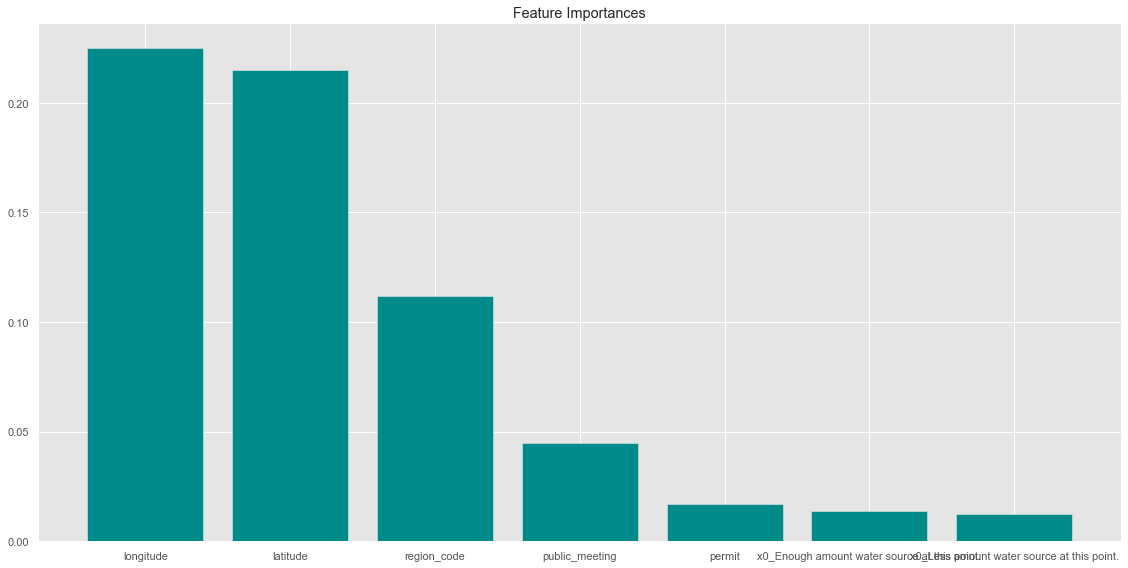

In [398]:
# Plot feature importances.

fig, ax = plt.subplots(figsize=(16,8))
for i,r in zip(t1,X_train_processed_df.columns):
    if i > 0.01:
        ax.bar(r, i, color='darkcyan')
        ax.set(title='Feature Importances')
fig.tight_layout()



In [188]:
# Initializing Random Forest.
r1 = RandomForestClassifier(random_state=42)

In [189]:
# Fitting train data.
r1.fit(X_train_processed_df,y_train)

RandomForestClassifier(random_state=42)

In [190]:
# Checking random forest most important features.
r1.feature_importances_

array([1.61540867e-01, 1.60389667e-01, 1.75112330e-02, 8.84434952e-03,
       9.98999268e-03, 1.01304196e-02, 1.04186628e-02, 4.34926765e-03,
       3.23178127e-03, 4.96438123e-03, 6.60745010e-04, 6.45069865e-04,
       4.87285542e-04, 9.76591752e-05, 2.52943635e-03, 2.70560721e-04,
       6.84564597e-04, 1.27543409e-03, 1.12402140e-03, 2.01194671e-03,
       3.53951168e-04, 1.81330567e-04, 2.03103713e-04, 8.87539011e-03,
       2.03475319e-03, 4.57001049e-04, 5.60687036e-04, 4.21751961e-04,
       4.46247904e-04, 8.72472501e-04, 4.43450165e-04, 9.36279344e-04,
       4.36230330e-04, 4.52979787e-04, 8.92361681e-04, 1.06334789e-02,
       5.60516192e-04, 4.77307033e-04, 1.03690415e-03, 1.95262000e-04,
       3.08581959e-04, 1.71045872e-04, 2.79952280e-04, 1.87109992e-04,
       1.58643353e-03, 1.50712306e-04, 2.00894060e-03, 7.96877358e-04,
       1.35530898e-03, 3.34810062e-04, 2.55275220e-03, 6.83559427e-04,
       5.61036532e-04, 2.21554015e-03, 1.52109469e-03, 7.58630083e-04,
      

In [191]:
# Sorting important features.
r11 =  sorted(r1.feature_importances_,reverse=True)

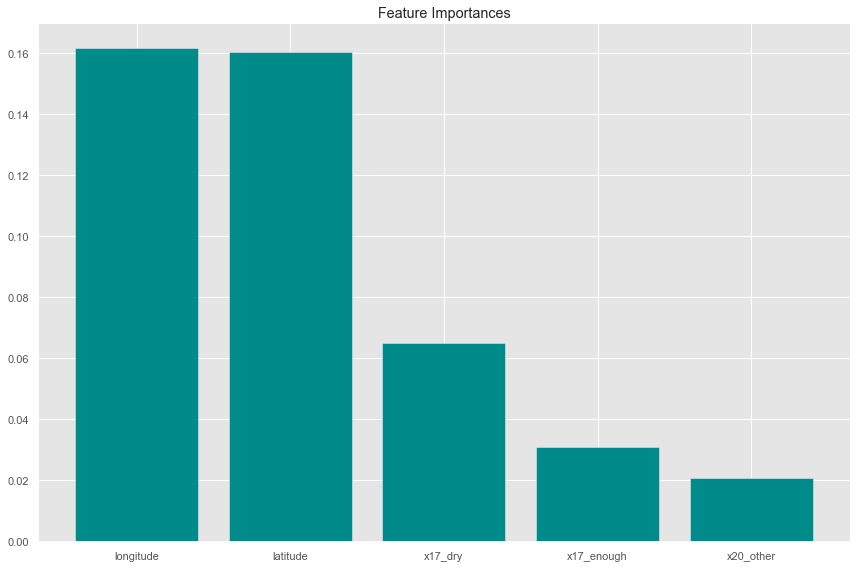

In [401]:
# Plot feature importances.
fig, ax = plt.subplots(figsize=(12,8))
for i,r in zip(r1.feature_importances_,X_train_processed_df.columns):
    if i > 0.018:
        ax.bar(r, i, color='darkcyan')
        ax.set(title='Feature Importances')
fig.tight_layout()

